In [2]:
# More compact notebook about BSC
import sys, os
sys.path.insert(0,"/home/zhi/SULI21")
import quasim as qua
import numpy as np
import pandas as pd
from scipy import optimize
from scipy import stats

In [2]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [3]:
QT = qua.QuaTel()
# Process the BSC to array of stars
# Output as [[star_num1,RA1,DEC1,S1],[star_num2,RA2,DEC2,S2],....] 
# in rad and Jy, S is in V-band
BSC = qua.BSC_process("/home/zhi/SULI21/bsc5.dat")

In [4]:
# Let wavelength of observation be 0.55 mircometer
lam = 0.55*10**(-6)

#NEW YORK COORD but the overall baseline is E-W, with B ~ 190m
pos_t_NY = [[-1.3,0.71,6.4*10**(6)],[-1.30004,0.71,6.4*10**(6)]]

# filter stars and give pair of stars
pos = BSC.BSC_filter(pos_t_NY,3)

# Period of Observation
T = 43200.0   # about 12 hours

print(pos)

[[[1.14500000e+03 9.82656730e-01 4.27033587e-01 6.93587701e+01]
  [1.14200000e+03 9.81202289e-01 4.20857060e-01 1.20531728e+02]]

 [[1.14900000e+03 9.85354718e-01 4.25297954e-01 1.03062669e+02]
  [1.14200000e+03 9.81202289e-01 4.20857060e-01 1.20531728e+02]]

 [[1.15600000e+03 9.87536380e-01 4.17977267e-01 7.74642613e+01]
  [1.14200000e+03 9.81202289e-01 4.20857060e-01 1.20531728e+02]]

 [[1.14900000e+03 9.85354718e-01 4.25297954e-01 1.03062669e+02]
  [1.14500000e+03 9.82656730e-01 4.27033587e-01 6.93587701e+01]]

 [[1.15600000e+03 9.87536380e-01 4.17977267e-01 7.74642613e+01]
  [1.14900000e+03 9.85354718e-01 4.25297954e-01 1.03062669e+02]]

 [[1.16500000e+03 9.92590562e-01 4.20711616e-01 2.58881719e+02]
  [1.14900000e+03 9.85354718e-01 4.25297954e-01 1.03062669e+02]]

 [[1.16500000e+03 9.92590562e-01 4.20711616e-01 2.58881719e+02]
  [1.15600000e+03 9.87536380e-01 4.17977267e-01 7.74642613e+01]]

 [[1.17800000e+03 9.99906401e-01 4.19809863e-01 1.28558674e+02]
  [1.16500000e+03 9.925905

In [ ]:
# Find pair rate of each pair separately due to memory issues.

In [7]:
max_res_rate = np.amax(num_0, axis=1)
min_res_rate = np.amin(num_0, axis=1)
avg_res_rate = (max_res_rate + min_res_rate)/2
avg_res_rate

array([0.0005835])

In [5]:
T_0 = 3000
pos[0,:,1] = pos[0,:,1] - 0.65
num_0, t_0, baseline, phase_0 = QT.get_num_photon(pos[0],pos_t_NY,lam,T_0,'pos')
w_t_0, new_t_0 = QT.freq_func(phase_0,t_0)
freq_0 = np.amax(np.absolute(w_t_0[0]))
avg_res_rate_0 = (np.amax(num_0,axis=1) + np.amin(num_0,axis=1))/2
print("max freq:", freq_0, "avg_res_rate:", avg_res_rate_0)
print(baseline)
print(freq_n0)

('max freq:', 43.966485733626925, 'avg_res_rate:', array([0.0005835]))
[-187.06684164  -51.92865253    0.        ]
43.96541676578931


In [6]:
f_rate_0, fft_0, fft_freq_0, freq_0 = QT.get_rates(num_0, t_0)

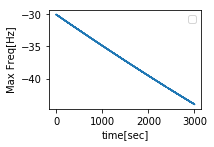

In [6]:
plt.subplot(2,2,4)
plt.plot(new_t_0,w_t_0[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

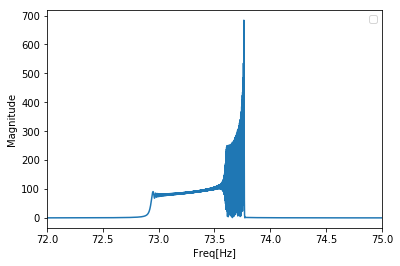

In [11]:
plt.figure()
plt.xlim([72,75])
plt.plot(fft_freq_0[:2000000],abs(fft_0[0])[:2000000])
plt.xlabel('Freq[Hz]');plt.ylabel('Magnitude')
plt.legend()

In [11]:
# Do the same for pair #1
T_1 = 3000
pos[1,:,1] = pos[1,:,1] - 1.0
num_1, t_1, baseline, phase_1 = QT.get_num_photon(pos[1],pos_t_NY,lam,T_1,'pos')
w_t_1, new_t_1 = QT.freq_func(phase_1,t_1)
freq_1 = np.amax(np.absolute(w_t_1[0]))
avg_res_rate_1 = (np.amax(num_1,axis=1) + np.amin(num_1,axis=1))/2
print("max freq:", freq_1, "avg_res_rate:", avg_res_rate_1)
print(freqn_1)

('max freq:', 108.1862881482729, 'avg_res_rate:', array([0.00080901]))
108.1703653452326


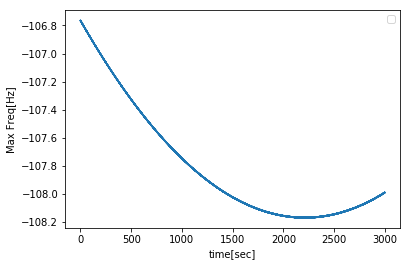

In [13]:
plt.figure()
plt.plot(new_tn_1,wn_t_1[0])
#plt.plot(new_t_1,w_t_1[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

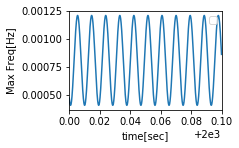

In [6]:
plt.subplot(2,2,4)
plt.plot(t_1,num_1[0])
plt.xlim([2000,2000.1])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

In [5]:
# Do the same for pair #2
T_2 = 3000
pos[2,:,1] = pos[2,:,1] - 0.35
num_2, t_2, baseline, phase_2 = QT.get_num_photon(pos[2],pos_t_NY,lam,T_2,'pos')
w_t_2, new_t_2 = QT.freq_func(phase_2,t_2)
freq_2 = np.amax(np.absolute(w_t_2[0]))
avg_res_rate_2 = (np.amax(num_2,axis=1) + np.amin(num_2,axis=1))/2

print("max freq:", freq_2, "avg_res_rate:", avg_res_rate_2)

('max freq:', 151.9799923556034, 'avg_res_rate:', array([0.00063437]))


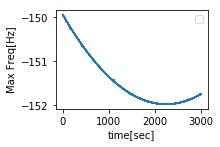

In [6]:
plt.subplot(2,2,4)
plt.plot(new_t_2,w_t_2[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

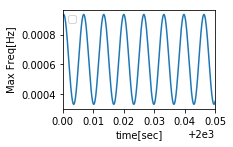

In [7]:
plt.subplot(2,2,4)
plt.plot(t_2,num_2[0])
plt.xlim([2000,2000.05])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

In [5]:
# Do the same for pair #3
T_3 = 3000
pos[3,:,1] = pos[3,:,1] - 0.3
num_3, t_3, baseline, phase_3 = QT.get_num_photon(pos[3],pos_t_NY,lam,T_3,'pos')
w_t_3, new_t_3 = QT.freq_func(phase_3,t_3)
freq_3 = np.amax(np.absolute(w_t_3[0]))
avg_res_rate_3 = (np.amax(num_3,axis=1) + np.amin(num_3,axis=1))/2

print("max freq:", freq_3, "avg_res_rate:", avg_res_rate_3)

('max freq:', 65.88074073240597, 'avg_res_rate:', array([0.00048108]))


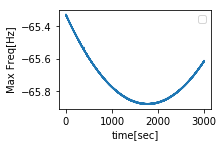

In [6]:
plt.subplot(2,2,4)
plt.plot(new_t_3,w_t_3[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

In [5]:
# Do the same for pair #4
T_4 = 3000
pos[4,:,1] = pos[4,:,1] + 0.40
num_4, t_4, baseline, phase_4 = QT.get_num_photon(pos[4],pos_t_NY,lam,T_4,'pos')
w_t_4, new_t_4 = QT.freq_func(phase_4,t_4)
freq_4 = np.amax(np.absolute(w_t_4[0]))
avg_res_rate_4 = (np.amax(num_4,axis=1) + np.amin(num_4,axis=1))/2

print("max freq:", freq_4, "avg_res_rate:", avg_res_rate_4)

('max freq:', 92.61899159901738, 'avg_res_rate:', array([0.00052737]))


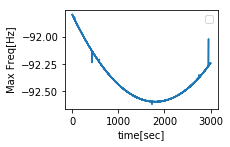

In [6]:
plt.subplot(2,2,4)
plt.plot(new_t_4,w_t_4[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

In [5]:
# Do the same for pair #5
T_5 = 3000
pos[5,:,1] = pos[5,:,1] - 0.30
num_5, t_5, baseline, phase_5 = QT.get_num_photon(pos[5],pos_t_NY,lam,T_5,'pos')
w_t_5, new_t_5 = QT.freq_func(phase_5,t_5)
freq_5 = np.amax(np.absolute(w_t_5[0]))
avg_res_rate_5 = (np.amax(num_5,axis=1) + np.amin(num_5,axis=1))/2

print("max freq:", freq_5, "avg_res_rate:", avg_res_rate_5)

('max freq:', 176.68018319129789, 'avg_res_rate:', array([0.0021199]))


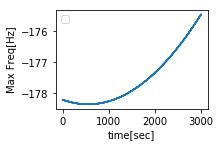

In [6]:
plt.subplot(2,2,4)
plt.plot(new_t_5,w_t_5[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

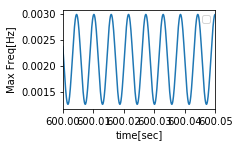

In [6]:
plt.subplot(2,2,4)
plt.plot(t_5,num_5[0])
plt.xlim([600,600.05])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

In [5]:
# Do the same for pair #6
T_6 = 3000
pos[6,:,1] = pos[6,:,1] - 0.80
num_6, t_6, baseline, phase_6 = QT.get_num_photon(pos[6],pos_t_NY,lam,T_6,'pos')
w_t_6, new_t_6 = QT.freq_func(phase_6,t_6)
freq_6 = np.amax(np.absolute(w_t_6[0]))
avg_res_rate_6 = (np.amax(num_6,axis=1) + np.amin(num_6,axis=1))/2

print("max freq:", freq_6, "avg_res_rate:", avg_res_rate_6)

('max freq:', 122.25188599527488, 'avg_res_rate:', array([0.00183064]))


In [11]:
baseline

array([-187.06684164,  -51.92865253,    0.        ])

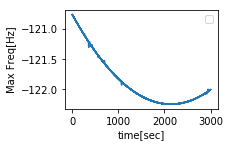

In [6]:
plt.subplot(2,2,4)
plt.plot(new_t_6,w_t_6[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

In [5]:
# Do the same for pair #7
T_7 = 3000
pos[7,:,1] = pos[7,:,1] - 0.5
num_7, t_7, baseline, phase_7 = QT.get_num_photon(pos[7],pos_t_NY,lam,T_7,'pos')
w_t_7, new_t_7 = QT.freq_func(phase_7,t_7)
freq_7 = np.amax(np.absolute(w_t_7[0]))
avg_res_rate_7 = (np.amax(num_7,axis=1) + np.amin(num_7,axis=1))/2

print("max freq:", freq_7, "avg_res_rate:", avg_res_rate_7)

('max freq:', 172.24665505356032, 'avg_res_rate:', array([0.00242907]))


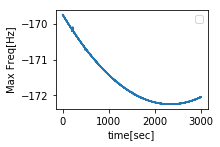

In [6]:
plt.subplot(2,2,4)
plt.plot(new_t_7,w_t_7[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

In [5]:
# Do the same for pair #8
T_8 = 3000
pos[8,:,1] = pos[8,:,1] - 1.5
num_8, t_8, baseline, phase_8 = QT.get_num_photon(pos[8],pos_t_NY,lam,T_8,'pos')
w_t_8, new_t_8 = QT.freq_func(phase_8,t_8)
freq_8 = np.amax(np.absolute(w_t_8[0]))
avg_res_rate_8 = (np.amax(num_8,axis=1) + np.amin(num_8,axis=1))/2

print("max freq:", freq_8, "avg_res_rate:", avg_res_rate_8)

('max freq:', 132.41243025546714, 'avg_res_rate:', array([0.00034168]))


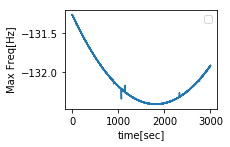

In [6]:
plt.subplot(2,2,4)
plt.plot(new_t_8,w_t_8[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

In [5]:
# Do the same for pair #9
T_9 = 3000
pos[9,:,1] = pos[9,:,1] + 0.1 
num_9, t_9, baseline, phase_9 = QT.get_num_photon(pos[9],pos_t_NY,lam,T_9,'pos')
w_t_9, new_t_9 = QT.freq_func(phase_9,t_9)
freq_9 = np.amax(np.absolute(w_t_9[0]))
avg_res_rate_9 = (np.amax(num_9,axis=1) + np.amin(num_9,axis=1))/2

print("max freq:", freq_9, "avg_res_rate:", avg_res_rate_9)

('max freq:', 14.643781511007358, 'avg_res_rate:', array([0.00113502]))


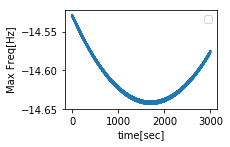

In [6]:
plt.subplot(2,2,4)
plt.plot(new_t_9,w_t_9[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

In [5]:
# Do the same for pair #10
T_10 = 3000
pos[10,:,1] = pos[10,:,1] - 1.1 
num_10, t_10, baseline, phase_10 = QT.get_num_photon(pos[10],pos_t_NY,lam,T_10,'pos')
w_t_10, new_t_10 = QT.freq_func(phase_10,t_10)
freq_10 = np.amax(np.absolute(w_t_10[0]))
avg_res_rate_10 = (np.amax(num_10,axis=1) + np.amin(num_10,axis=1))/2

print("max freq:", freq_10, "avg_res_rate:", avg_res_rate_10)

('max freq:', 201.89925608563607, 'avg_res_rate:', array([0.00036717]))


In [6]:
f_rate_10, fft_10, fft_freq_10, freq_10 = QT.get_rates(num_10, t_10)

In [14]:
freq_10

array([201.79166251])

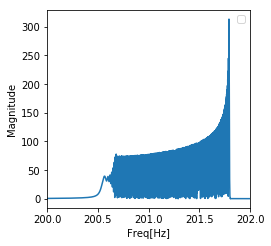

In [13]:
plt.figure(figsize=(8,8))
#plt.subplot(2,2,1)
#plt.plot(new_t_10,w_t_10[0])
#plt.xlim([20000,20000.1])
#plt.xlabel('time[sec]');plt.ylabel('Pair rate[# Hz]')
#plt.legend()
plt.subplot(2,2,2)
plt.xlim([200,202])
plt.plot(fft_freq_10[:2000000],np.abs(fft_10[0][:2000000]))
plt.xlabel('Freq[Hz]');plt.ylabel('Magnitude')
plt.legend()

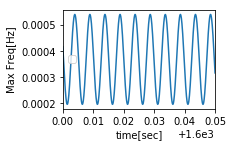

In [7]:
plt.subplot(2,2,4)
plt.plot(t_10,num_10[0])
plt.xlim([1600,1600.05])
plt.xlabel('time[sec]');plt.ylabel('Max Freq[Hz]')
plt.legend()

In [5]:
# Do the same for pair #11
T_11 = 3000
pos[11,:,1] = pos[11,:,1] - 1.1 
num_11, t_11, baseline, phase_11 = QT.get_num_photon(pos[11],pos_t_NY,lam,T_11,'pos')
w_t_11, new_t_11 = QT.freq_func(phase_11,t_11)
freq_11 = np.amax(np.absolute(w_t_11[0]))
avg_res_rate_11 = (np.amax(num_11,axis=1) + np.amin(num_11,axis=1))/2

print("max freq:", freq_11, "avg_res_rate:", avg_res_rate_11)

('max freq:', 146.38828121143735, 'avg_res_rate:', array([0.00080528]))


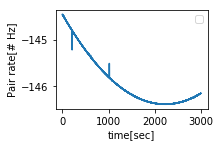

In [6]:
plt.subplot(2,2,4)
plt.plot(new_t_11,w_t_11[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Pair rate[# Hz]')
plt.legend()

In [5]:
# Do the same for pair #12
T_12 =3000
pos[12,:,1] = pos[12,:,1] - 0
num_12, t_12, baseline, phase_12 = QT.get_num_photon(pos[12],pos_t_NY,lam,T_12,'pos')
w_t_12, new_t_12 = QT.freq_func(phase_12,t_12)
freq_12 = np.amax(np.absolute(w_t_12[0]))
avg_res_rate_12 = (np.amax(num_12,axis=1) + np.amin(num_12,axis=1))/2

print("max freq:", freq_12, "avg_res_rate:", avg_res_rate_12)

('max freq:', 0.06666387924914713, 'avg_res_rate:', array([0.01153067]))


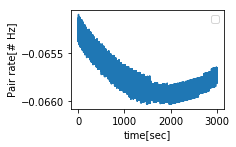

In [6]:
plt.subplot(2,2,4)
plt.plot(new_t_12,w_t_12[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Pair rate[# Hz]')
plt.legend()

In [5]:
# Do the same for pair #13
T_13 = 3000
pos[13,:,1] = pos[13,:,1] + 0.3
num_13, t_13, baseline, phase_13 = QT.get_num_photon(pos[13],pos_t_NY,lam,T_13,'pos')
w_t_13, new_t_13 = QT.freq_func(phase_13,t_13)
freq_13 = np.amax(np.absolute(w_t_13[0]))
avg_res_rate_13 = (np.amax(num_13,axis=1) + np.amin(num_13,axis=1))/2

print("max freq:", freq_13, "avg_res_rate:", avg_res_rate_13)

('max freq:', 190.12785265157635, 'avg_res_rate:', array([0.00104459]))


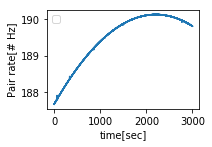

In [6]:
plt.subplot(2,2,4)
plt.plot(new_t_13,w_t_13[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Pair rate[# Hz]')
plt.legend()

In [7]:
# Do the same for pair #14
T_14 = 3000
pos[14,:,1] = pos[14,:,1] + 1.0
num_14, t_14, baseline, phase_14 = QT.get_num_photon(pos[14],pos_t_NY,lam,T_14,'pos')
w_t_14, new_t_14 = QT.freq_func(phase_14,t_14)
freq_14 = np.amax(np.absolute(w_t_14[0]))
avg_res_rate_14 = (np.amax(num_14,axis=1) + np.amin(num_14,axis=1))/2

print("max freq:", freq_14, "avg_res_rate:", avg_res_rate_14, "RA:", pos[14,:,1])

('max freq:', 0.5566930313446047, 'avg_res_rate:', array([0.00311654]))


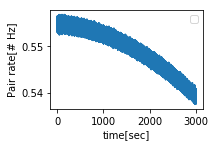

In [8]:
plt.subplot(2,2,4)
plt.plot(new_t_14,w_t_14[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Pair rate[# Hz]')
plt.legend()

In [5]:
# Do the same for pair #15
T_15 = 3000
pos[15,:,1] = pos[15,:,1] + 0.9
num_15, t_15, baseline, phase_15 = QT.get_num_photon(pos[15],pos_t_NY,lam,T_15,'pos')
w_t_15, new_t_15 = QT.freq_func(phase_15,t_15)
freq_15 = np.amax(np.absolute(w_t_15[0]))
avg_res_rate_15 = (np.amax(num_15,axis=1) + np.amin(num_15,axis=1))/2

print("max freq:", freq_15, "avg_res_rate:", avg_res_rate_15)

('max freq:', 1.6439311523953455, 'avg_res_rate:', array([0.0048175]))


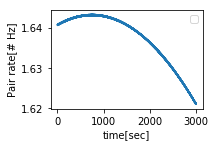

In [12]:
plt.subplot(2,2,4)
plt.plot(new_t_15,w_t_15[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Pair rate[# Hz]')
plt.legend()

In [5]:
# Do the same for pair #16
T_16 = 3000
pos[16,:,1] = pos[16,:,1] - 0.4
num_16, t_16, baseline, phase_16 = QT.get_num_photon(pos[16],pos_t_NY,lam,T_16,'pos')
w_t_16, new_t_16 = QT.freq_func(phase_16,t_16)
freq_16 = np.amax(np.absolute(w_t_16[0]))
avg_res_rate_16 = (np.amax(num_16,axis=1) + np.amin(num_16,axis=1))/2

print("max freq:", freq_16, "avg_res_rate:", avg_res_rate_16)

('max freq:', 86.1889440601231, 'avg_res_rate:', array([0.00472704]))


In [30]:
pos[16,:,:]

array([[5.06200000e+03, 3.31345687e+00, 9.59722619e-01, 9.05944064e+01],
       [5.05400000e+03, 3.30778455e+00, 9.58626940e-01, 4.49884866e+02]])

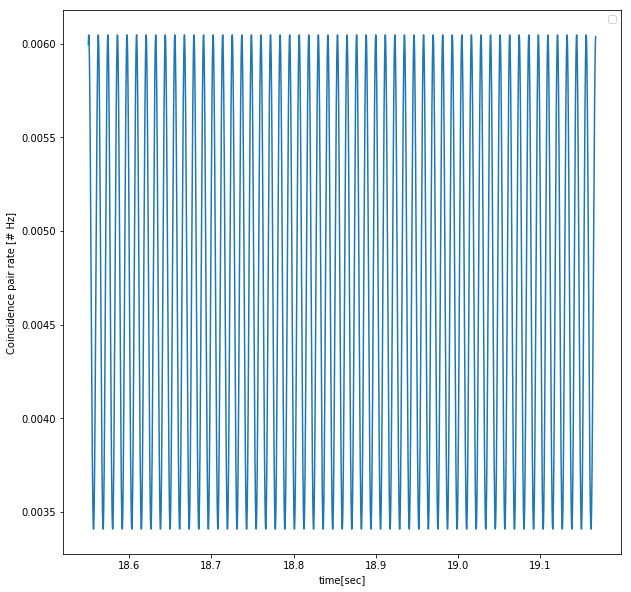

In [29]:
plt.figure(figsize=(10,10))
plt.plot(t_16[300000:310000],num_16[0][300000:310000])
plt.xlabel('time[sec]');plt.ylabel('Coincidence pair rate [# Hz]')
plt.legend()

In [20]:
f_rate_16, fft_16, fft_freq_16, freq_16 = QT.get_rates(num_16, t_16)

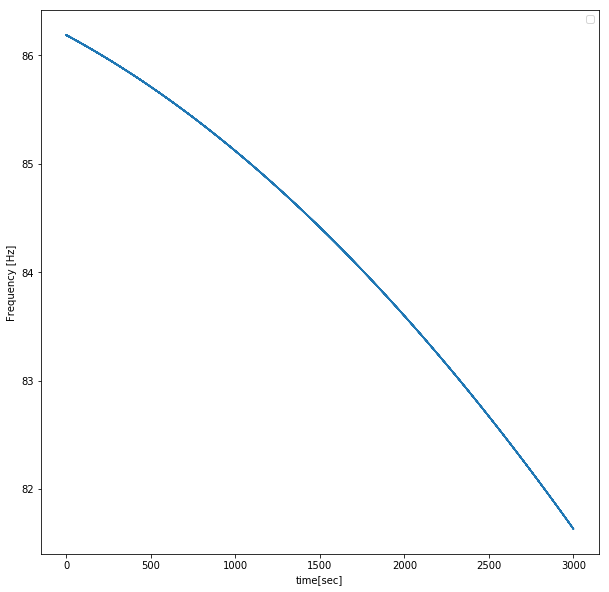

In [6]:
plt.figure(figsize=(10,10))
plt.plot(new_t_16,w_t_16[0])
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Frequency [Hz]')
plt.legend()

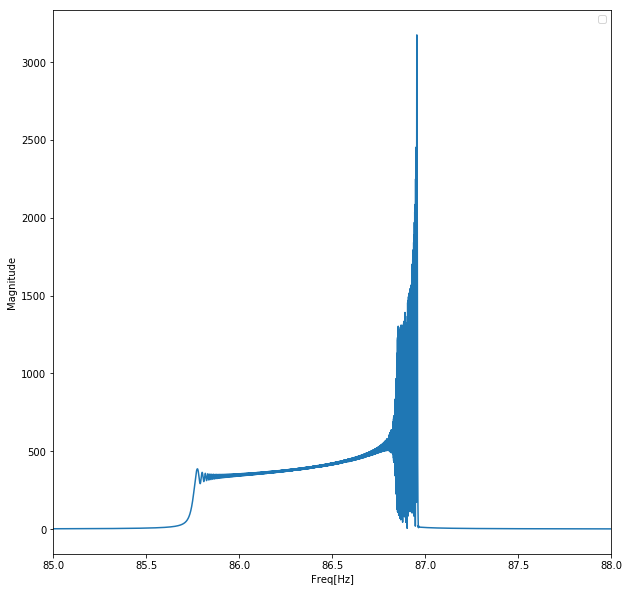

In [23]:
plt.figure(figsize=(10,10))
plt.xlim([85,88])
plt.plot(fft_freq_16[:2000000],abs(fft_16[0])[:2000000])
plt.xlabel('Freq[Hz]');plt.ylabel('Magnitude')
plt.legend()

In [5]:
# Do the same for pair #17
T_17 = 3000
pos[17,:,1] = pos[17,:,1] - 0.5
num_17, t_17, baseline, phase_17 = QT.get_num_photon(pos[17],pos_t_NY,lam,T_17,'pos')
w_t_17, new_t_17 = QT.freq_func(phase_17,t_17)
freq_17 = np.amax(np.absolute(w_t_17[0]))
avg_res_rate_17 = (np.amax(num_17,axis=1) + np.amin(num_17,axis=1))/2

print("max freq:", freq_17, "avg_res_rate:", avg_res_rate_17)


('max freq:', 83.25392709210126, 'avg_res_rate:', array([0.00056186]))


In [12]:
D

array([[[-0.00113325, -0.00315933,  0.00066535],
        [-0.00113325, -0.00315933,  0.00066535],
        [-0.00113325, -0.00315933,  0.00066535],
        ...,
        [-0.00179188, -0.00283809,  0.00066535],
        [-0.00179188, -0.00283809,  0.00066535],
        [-0.00179188, -0.00283809,  0.00066535]]])

In [7]:
f_rate_17, fft_17, fft_freq_17, freq_17 = QT.get_rates(num_17, t_17)

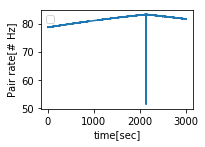

In [6]:
plt.subplot(2,2,4)
plt.plot(new_t_17,np.absolute(w_t_17[0]))
#plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Pair rate[# Hz]')
plt.legend()

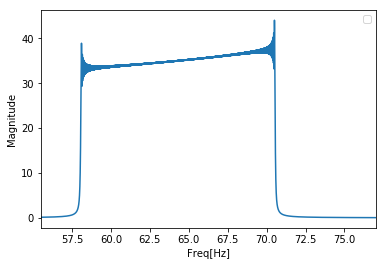

In [11]:
plt.figure()
plt.xlim([55.5,77])
plt.plot(fft_freq_17[:500000],abs(fft_17[0])[:500000])
plt.xlabel('Freq[Hz]');plt.ylabel('Magnitude')
plt.legend()

In [3]:
#max_freq = np.array([74.274, 114.677, 156.505, 66.237, 93.597, 183.880, 124.577,
#                     178.902, 135.379, 14.646, 212.807, 150.421, 0.066, 199.474,
#                     0.555, 1.643, 87.792, 87.213])
max_freq = np.array([73.786, 108.186, 151.98, 65.88, 92.619, 176.68, 122.25, 172.246, 
                     132.41, 14.644, 201.9, 146.39, 0.0666, 190.128, 0.555, 1.644, 86.965, 
                     86.41])
avg_pair_rate = np.array([0.0005835, 0.00080901, 0.00063437, 0.00048108, 0.00052737,
                          0.0021199, 0.00183064, 0.00242907, 0.00034168, 0.00113502,
                          0.00036717, 0.00080528, 0.01153067, 0.00104459, 0.00311654, 
                          0.0048175, 0.00472704, 0.00056186])


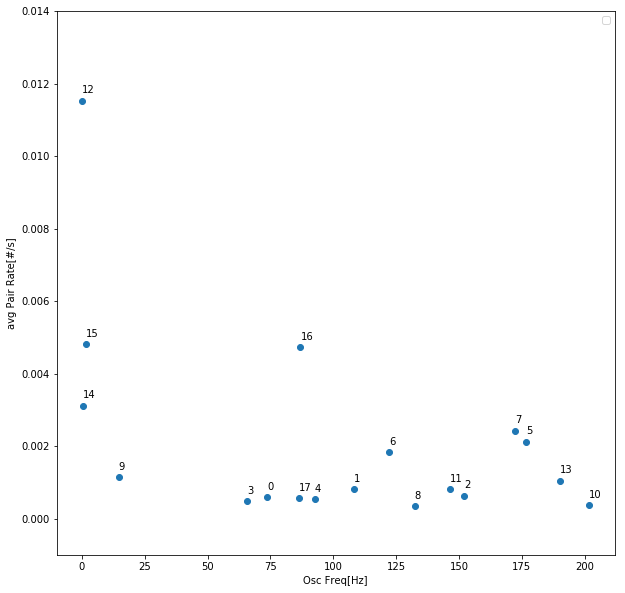

In [6]:
n = np.arange(0,18)
plt.figure(figsize=(10,10))
plt.ylim([-0.001,0.014])
plt.scatter(max_freq, avg_pair_rate)

for i, label in enumerate(n):
    plt.annotate(label, (max_freq[i],avg_pair_rate[i]+0.0002), size=10)
    
plt.xlabel("Osc Freq[Hz]");plt.ylabel("avg Pair Rate[#/s]")
plt.legend()
plt.show()

In [5]:
# average flux density of the pairs:
avg_flux_den = np.mean(pos, axis=1)[:,3]

# Separation in DEC and RA of pairs
DEC_diff = abs(np.diff(pos,axis=1))[:,:,2]
RA_diff = abs(np.diff(pos,axis=1))[:,:,1]
avg_flux_den


NameError: name 'pos' is not defined

In [4]:
r1 ,p = stats.pearsonr(RA_diff[:,0],max_freq)
r2 ,p = stats.pearsonr(DEC_diff[:,0],max_freq)
print(r1)
print(r2)

n = np.arange(0,18)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.xlim([-0.001,0.011])
plt.scatter(RA_diff[:,0], max_freq[:])
#for i, label in enumerate(n):
#    plt.annotate(label, (RA_diff[i,0],max_freq[i]), size=12)
plt.xlabel('RA Angular Separation [Rad]');plt.ylabel('Oscillation Freq [Hz]')
plt.legend(['r = 0.941'])

plt.subplot(2,2,2)
plt.xlim([-0.001,0.011])
plt.scatter(DEC_diff[:,0], max_freq)
#for i, label in enumerate(n):
#    plt.annotate(label, (DEC_diff[i,0],max_freq[i]), size=12)
plt.xlabel('DEC Angular Separation [Rad]')
plt.legend(['r = 0.42'])

plt.subplot(2,2,3)
plt.ylim([0,0.015])
plt.scatter(avg_flux_den, avg_pair_rate)
#for i, label in enumerate(n):
#    plt.annotate(label, (avg_flux_den[i],avg_pair_rate[i]), size=12)
plt.xlabel('Avg Flux density [Jy]');plt.ylabel('Avg pair rate [#/s]')
plt.legend()

NameError: name 'RA_diff' is not defined

In [6]:


%matplotlib notebook

<IPython.core.display.Javascript object>


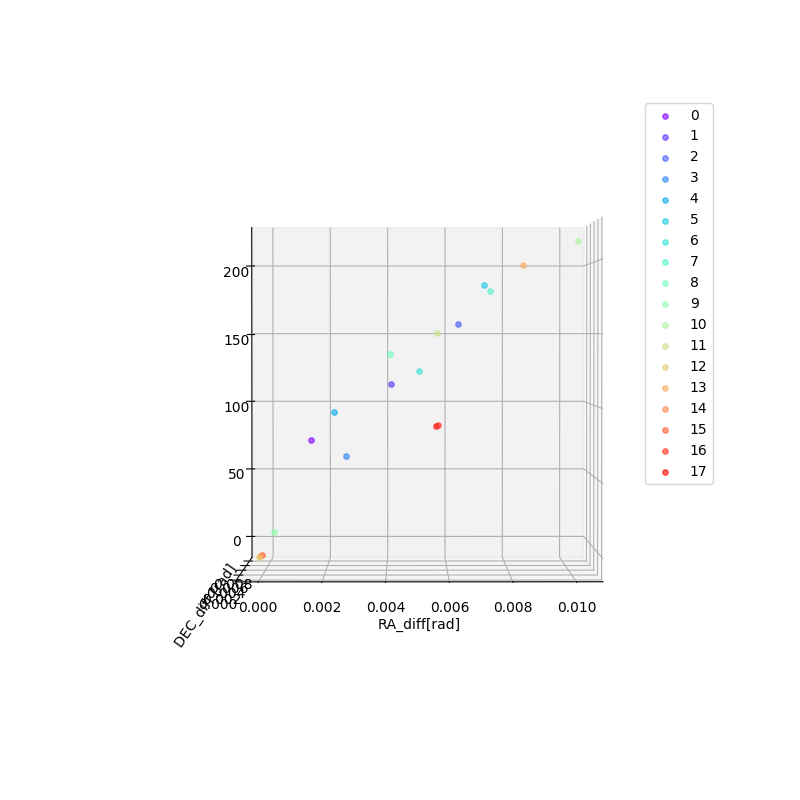

In [49]:
L = len(DEC_diff)
colors = cm.rainbow(np.linspace(0,1,L))
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection = '3d')

for i in range(L):
    ax.scatter(RA_diff[i],DEC_diff[i],max_freq[i],alpha = 0.6, color=colors[i],s=15,label=i)
plt.xlabel('RA_diff[rad]');plt.ylabel('DEC_diff [rad]')
plt.legend()
plt.show()

In [73]:
a = np.array([[6,2,4],[2,6,7]])
cond = np.where(a[:,1] > 3)


array([2, 6])

In [200]:
pos_t = np.array(pos_t_NY)

        
        #Select out stars that are never in the plane of tele, diff in DEC less than some deg
cond1 = np.where((np.absolute(BSC.pos_s[:,2] - pos_t[0,1]) < np.pi/6.) &
                         (np.absolute(BSC.pos_s[:,2] - pos_t[1,1]) < np.pi/6.))

pos_s = BSC.pos_s[cond1]
cond2 = np.where(pos_s[:,3] > 50.0)
pos_s = pos_s[cond2]
print(pos_s[210])


delay = ((9 - 3.0)*30*np.pi/180)
cond_pos = np.where((pos_s[:,1] - delay> np.pi) & (pos_s[:,1]-delay < 5*np.pi/4))
print(pos_s[cond_pos].shape)
cond_neg = np.where((pos_s[:,1]-delay > -np.pi) & (pos_s[:,1]-delay < -3*np.pi/4))
print(pos_s[cond_neg].shape)

pos_s = np.vstack((pos_s[cond_neg],pos_s[cond_pos]))
print(pos_s.shape)

[5.32900000e+03 3.72402357e+00 9.03910868e-01 5.56034045e+01]
(0, 4)
(45, 4)
(45, 4)


In [199]:
pos_t = np.array(pos_t_NY)

        
        #Select out stars that are never in the plane of tele, diff in DEC less than some deg
cond1 = np.where((np.absolute(BSC.pos_s[:,2] - pos_t[0,1]) < np.pi/6.) &
                         (np.absolute(BSC.pos_s[:,2] - pos_t[1,1]) < np.pi/6.))

pos_s = BSC.pos_s[cond1]
cond2 = np.where(pos_s[:,3] > 50.0)
pos_s = pos_s[cond2]
print(pos_s[210])

delay = ((9 - 3.0)*30*np.pi/180)
cond_pos = np.where(( np.mod(pos_s[:,1]-delay,2*np.pi)> np.pi) & (np.mod(pos_s[:,1]-delay,2*np.pi) < 5*np.pi/4))
print(pos_s[210])

pos_s = pos_s[cond_pos]
#pos_s = np.vstack((pos_s_check[cond_lo],pos_s_check[cond_hi]))
print(pos_s.shape)

[5.32900000e+03 3.72402357e+00 9.03910868e-01 5.56034045e+01]
[5.32900000e+03 3.72402357e+00 9.03910868e-01 5.56034045e+01]
(45, 4)
